### ZIRIBAGWA PETER MSC. BIOINFORMATICS
### AGASI HERBERT   MSC. BIOINFORMATICS
### RAZACK WASSWA   MSC. BIOINFORMATICS
### EVA AKURUT      MSC. BIOINFORMATICS
### GROUP  ASSIGNMENT

### 1.0 - LOADING THE NECCESARY LIBRARIES

In [42]:
#pip install xgboost
#pip install eli5
#pip install missingno

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#statistics
from scipy.stats import norm, skew #for some statistics

#Missing Info
import missingno as msno

#Dimentionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

from sklearn import cluster
import sklearn

#scikit learn libraries
#Lineaer Models
from sklearn.linear_model import BayesianRidge,RidgeCV,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Lineaer Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tree
from sklearn.tree import DecisionTreeRegressor

#Ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from xgboost import plot_importance
from xgboost import plot_tree
from xgboost.sklearn import XGBRegressor


##
#eli5
import eli5
from eli5.sklearn import PermutationImportance

##
import sklearn.gaussian_process as gp

#Kaggle 
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

### 2.0 - IMPORTING THE DATASETS

In [57]:
## Loading the data
Train = pd.read_csv("data/train.csv")
Test = pd.read_csv("data/test.csv")
Ids =Test["Id"]
Train.index = Train["Id"]
Test.index =Test["Id"]

### 3.0 - EXPLANATORY DATA ANALYSIS

### 3.1 - Display the first 10 rows of the train dataset

In [4]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3.2 - Checking the shape of the train dataset
- This out puts the number of rows and columns within the dataset

In [58]:
Train.shape

(1460, 81)

### 3.3 - Display the first 10 rows of the test dataset

### 3.4 Descriptive statistics on the Targert column Sale price

In [59]:
Train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 3.5 A Histogram  and Line graph representing the distribution of the Sale Price
#### Looking at the distribution of the data 
- There are very few records above the 500,000 mark.
- The prices in this range are exorbitant have no special feature hence dropping them is good idea 
- The prices are also skewed to the left. A test to confirm and if the dropping the above columns will fix the skew
- 

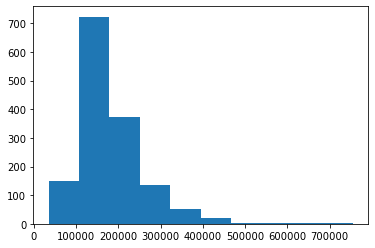

In [60]:
#Train.SalePrice.plot(kind='box')
plt.hist(Train.SalePrice)
#plt.density(Train.SalePrice)
plt.show()



Text(0.5, 1.0, 'An histogram showing the distribution of the SalePrice across the train dataset')

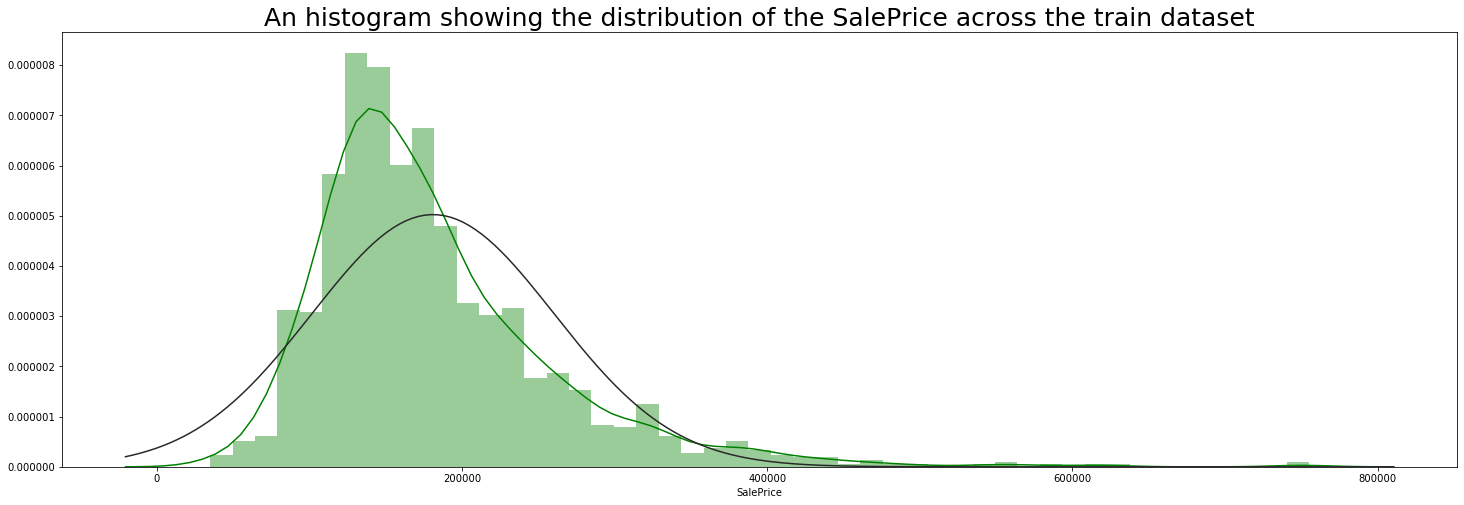

In [61]:
plt.figure(figsize=(25,8))
sns.distplot(Train['SalePrice'], fit=norm, color="green")
plt.title('An histogram showing the distribution of the SalePrice across the train dataset', fontsize=25)

Text(0, 0.5, 'sale price')

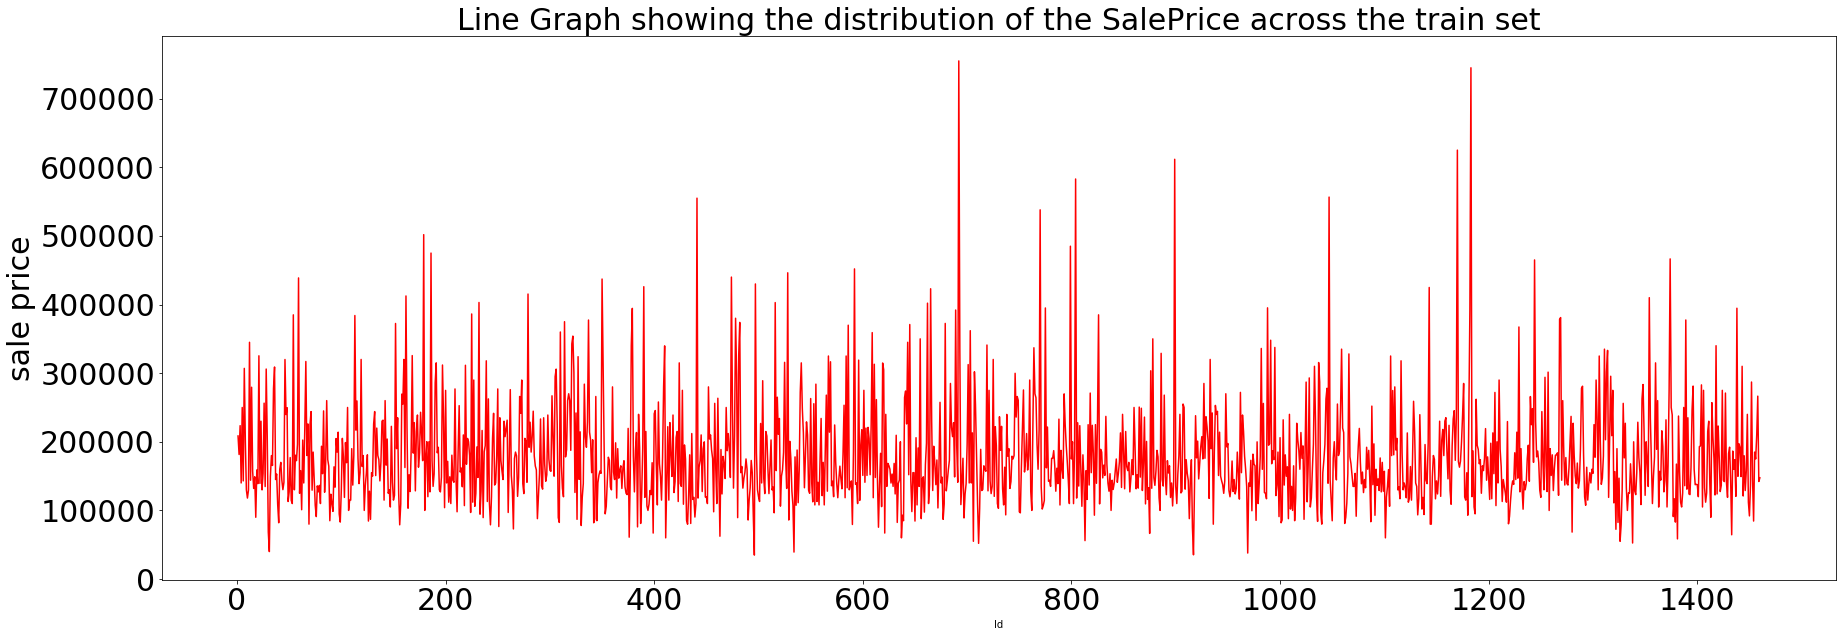

In [62]:
Train['SalePrice'].plot(fontsize=30,figsize = (30,10), color ='red')
plt.title('Line Graph showing the distribution of the SalePrice across the train set', fontsize=30)
plt.ylabel('sale price',fontsize = 30)

#### Checking for the skewness of the SalePrice
- The skew is 1.8828

In [63]:
Train["SalePrice"].skew()

1.8828757597682129

#### Dropping the the rows that have values greater than 520000
- There are 8 rows with values above the 520000


In [64]:
Train[Train["SalePrice"]>520000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
441,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
692,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
770,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
804,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1047,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1170,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [65]:
#Dropping records greater than 510000
#Train = Train['SalePrice'] - Train[Train['SalePrice']>600000]
#Salesindex = Train[Train['SalePrice']>600000].index
#Train.drop(Salesindex,inplace=True)
Train.drop(Train[Train['SalePrice']>520000].index,inplace=True)

#### Testing the skew after dropping the columns above 520000
- The skew in 1.20800 there is reduction in the skewness however not good enough
- The dimensions of the Train dataset are (1452, 81)


In [66]:
Train["SalePrice"].skew()

1.2359845254980464

In [67]:
Train.shape

(1452, 81)

## Checking for the datatypes for the Train Dataset
- The data has 43 categorical features and 38 Numerical Features

In [68]:
Train.dtypes[:30], Train.dtypes[30:]

(Id                int64
 MSSubClass        int64
 MSZoning         object
 LotFrontage     float64
 LotArea           int64
 Street           object
 Alley            object
 LotShape         object
 LandContour      object
 Utilities        object
 LotConfig        object
 LandSlope        object
 Neighborhood     object
 Condition1       object
 Condition2       object
 BldgType         object
 HouseStyle       object
 OverallQual       int64
 OverallCond       int64
 YearBuilt         int64
 YearRemodAdd      int64
 RoofStyle        object
 RoofMatl         object
 Exterior1st      object
 Exterior2nd      object
 MasVnrType       object
 MasVnrArea      float64
 ExterQual        object
 ExterCond        object
 Foundation       object
 dtype: object,
 BsmtQual          object
 BsmtCond          object
 BsmtExposure      object
 BsmtFinType1      object
 BsmtFinSF1         int64
 BsmtFinType2      object
 BsmtFinSF2         int64
 BsmtUnfSF          int64
 TotalBsmtSF        int64


### Preview of the categorical Features

In [70]:
## Filtering out columns that have categorical data to loo
arr=[]
for x,y in enumerate(Train.dtypes):
    if(y=="object"):
        arr.append(x)
x=Train.columns[arr]
print(x)
print(len(x))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


### Looking at t preview of the data these columns have a very suspicous
1. MasVnrArea
2. BsmtFinSF2
3. 2ndFlrSF
4. WoodDeckSF
5. OpenPorchSF
6. EnclosedPorch
7. 3SsnPorch
8. ScreenPorch
9. PoolArea
10. PoolQC
11. Fence
12. MiscFeature
13. MiscVal
14. MoSold
15. LowQualFinSF


###  A plot showing the missing data matrix of the train dataset
- This shows the missing data patterns with in the database
- The sparkline on the right gives a summary of the general shape of the data completeness

Text(0.5, 1.0, 'A PLOT SHOWING THE MISSING DATA MATRIX')

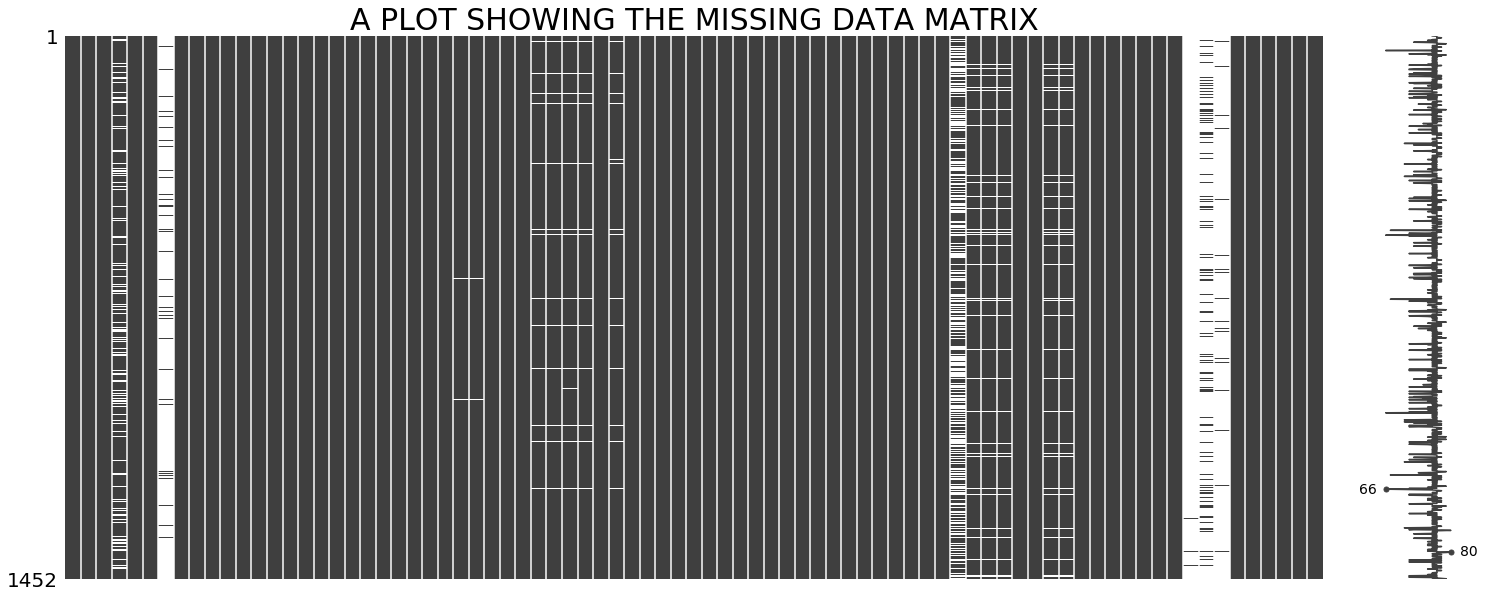

In [71]:
msno.matrix(Train)
plt.title('A PLOT SHOWING THE MISSING DATA MATRIX', fontsize=30)

### A heatmap showing the nullity of the train dataset
- The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1); the features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed.
- A perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

Text(0.5, 1, 'A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET')

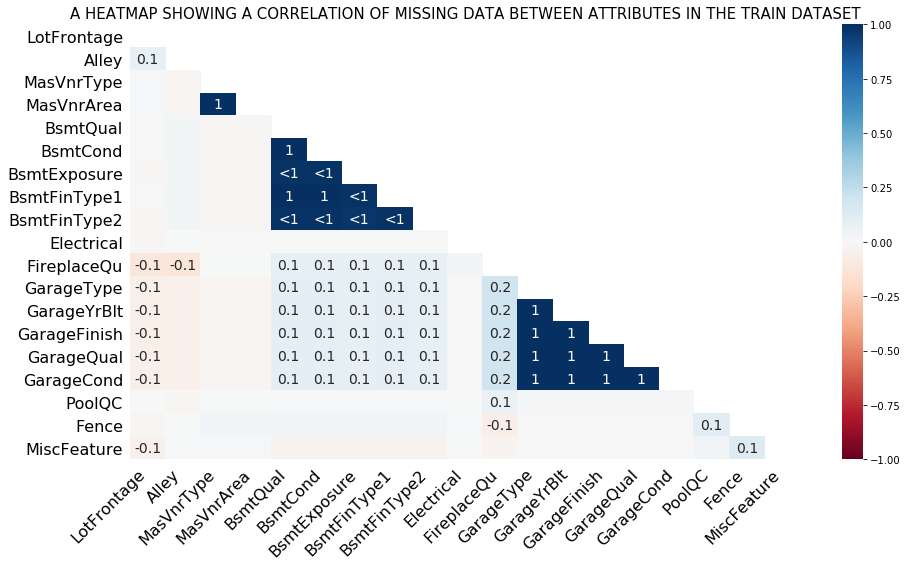

In [45]:
msno.heatmap(Train,figsize=(15,8))
plt.title('A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET', fontsize=15)

###  Visualising the percentage of  missing data per column using a histogram

Text(0.5, 1.0, 'Percentage of null values per attribute')

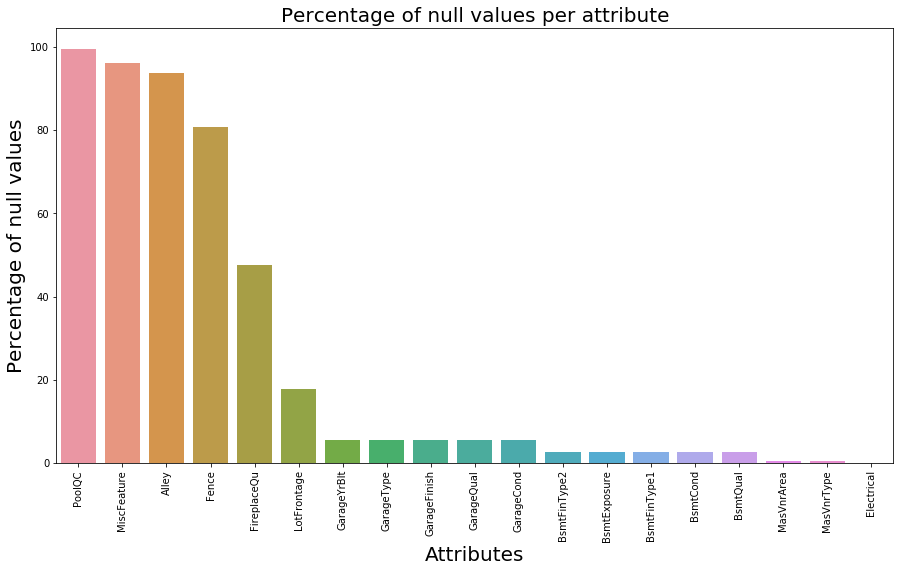

In [72]:
Train_clone = Train.copy() # this makes a clone of the train dataset and names it 'train_clone'

### Now i use the train_clone dataset to compute the percentage of unknown values in each column
columns_with_NaNs = Train_clone.isnull().sum() #  first assign all the output into this object
columns_with_NaNs = columns_with_NaNs.drop(columns_with_NaNs[columns_with_NaNs==0].index) # filter out only those greater than 0. this because zero means no NaNs and those greater than zero indicate the presence of NaNs
columns_with_NaNs = columns_with_NaNs.sort_values(ascending=False) # sort them in descending order
columns_with_NaNs =  columns_with_NaNs / len(Train_clone)*100

### Plot the percentages on a histogram
f, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation='90')
sns.barplot(x=columns_with_NaNs.index, y=columns_with_NaNs)
plt.xlabel('Attributes', fontsize=20)
plt.ylabel('Percentage of null values', fontsize=20)
plt.title('Percentage of null values per attribute', fontsize=20)

#### Dropping columns with high number of nulls 
- Alley           1369
- PoolQC           1453
- Fence            1179
- MiscFeature      1406
- LotFrontage      259
- FireplaceQu       690

In [73]:

Train =Train.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])


Tran =Train.dropna(axis=0, how="any",subset=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                                             "BsmtFinType2","GarageType","GarageYrBlt","GarageFinish",
                                             "GarageQual","GarageCond","MasVnrType","MasVnrArea","Electrical"
                                            ],inplace=True)

Test =Test.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])


In [74]:
#Confirming there are no nulls
Train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [75]:
#Handling Missing values int Test dataset
Test = Test.fillna(Test.mean())
Test.isna().sum().sum()

555

In [17]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1330 non-null   int64  
 1   MSSubClass     1330 non-null   int64  
 2   MSZoning       1330 non-null   object 
 3   LotArea        1330 non-null   int64  
 4   Street         1330 non-null   object 
 5   LotShape       1330 non-null   object 
 6   LandContour    1330 non-null   object 
 7   Utilities      1330 non-null   object 
 8   LotConfig      1330 non-null   object 
 9   LandSlope      1330 non-null   object 
 10  Neighborhood   1330 non-null   object 
 11  Condition1     1330 non-null   object 
 12  Condition2     1330 non-null   object 
 13  BldgType       1330 non-null   object 
 14  HouseStyle     1330 non-null   object 
 15  OverallQual    1330 non-null   int64  
 16  OverallCond    1330 non-null   int64  
 17  YearBuilt      1330 non-null   int64  
 18  YearRemo

### Visualise correlation between numerical features and the saleprice

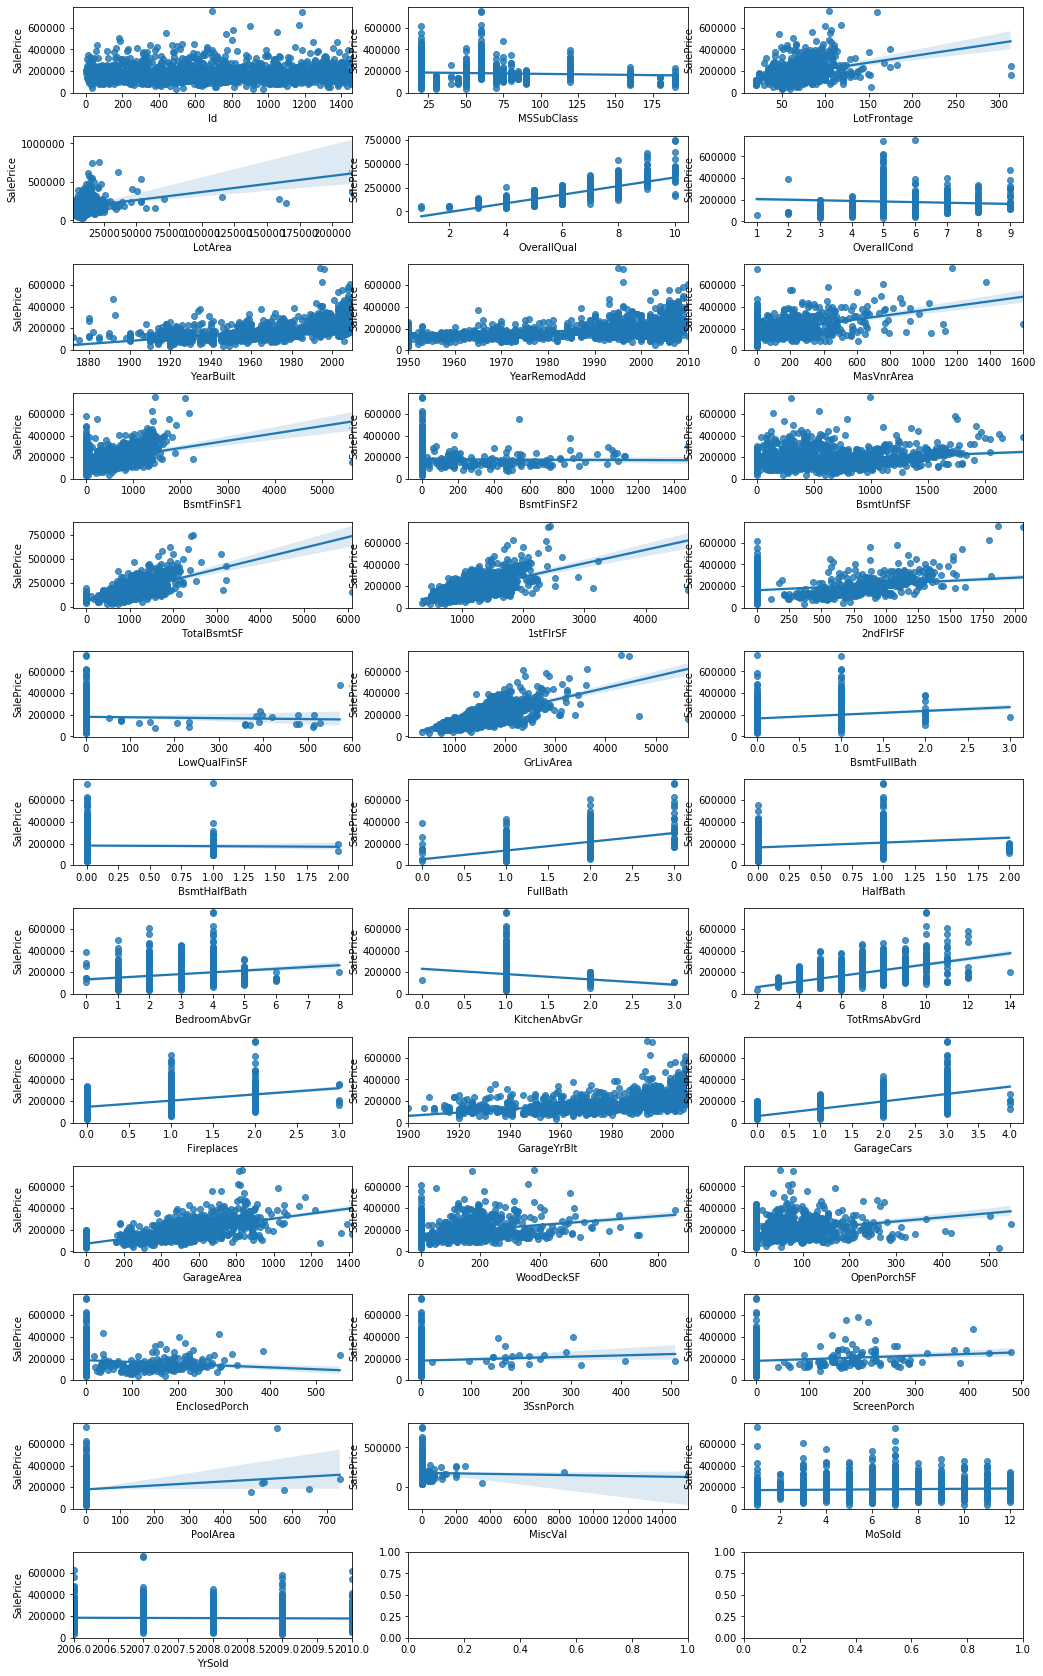

In [50]:
# select out only numerical values
Train_numerical = Train.select_dtypes(include=[np.number])

fig, axs = plt.subplots(13,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(Train_numerical.columns):
    if col != 'SalePrice':
        sns.regplot(Train_numerical[col], Train_numerical['SalePrice'], ax = axs[ind])
    
plt.show()

 ### Visualizing the distribution of the categorical features in relation to the saleprice

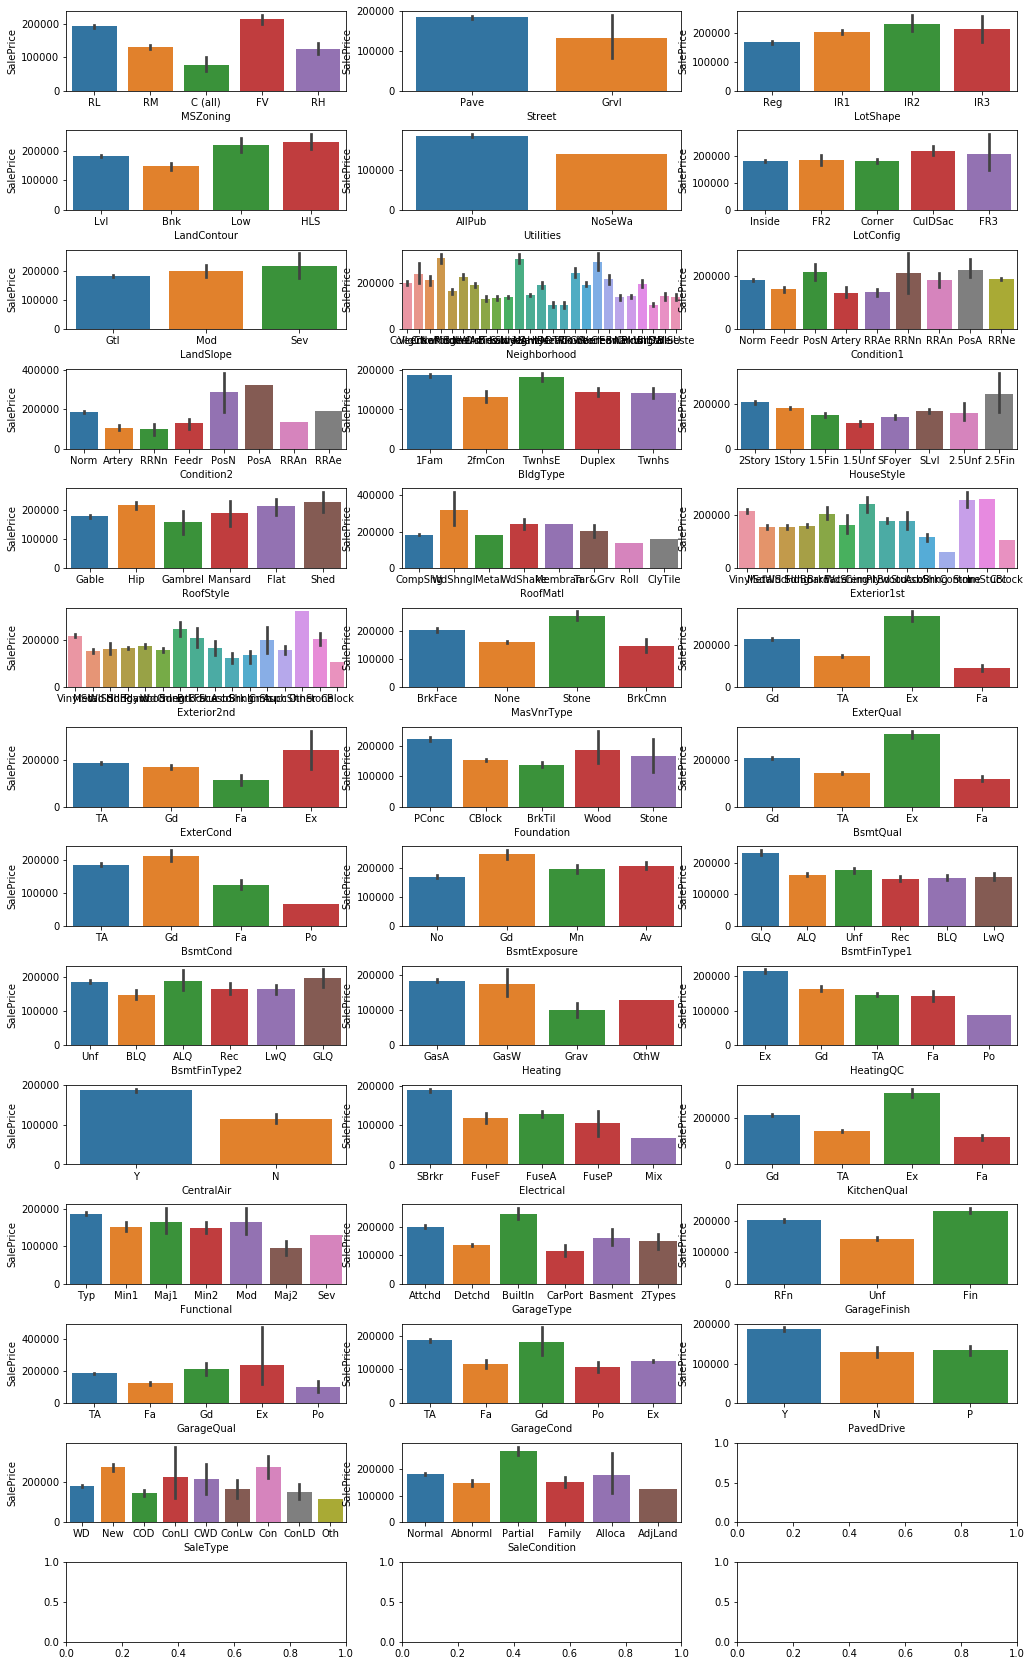

In [76]:
pd.set_option('chained',None)

# select out only columns having categorical data i.e, exclude those with numbers as shown in the command below
Train_categorical  = Train.select_dtypes(exclude=[np.number])

#add the SalePrice column
Train_categorical['SalePrice'] = Train['SalePrice']

fig, axs = plt.subplots(14,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(Train_categorical.columns):
    if col != 'SalePrice':
        sns.barplot(Train_categorical[col], Train_categorical['SalePrice'], ax = axs[ind])

plt.show()

## Encoding the categorical variables

In [77]:
#Encoding the categorical variables
# converting type of columns to 'category'
#bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
#bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
#bridge_df
Catcols = Train.select_dtypes(include="O")

for cols in Catcols:
    # converting type of columns to 'category'
    Train[cols] = Train[cols].astype('category')
    # Assigning numerical values 
    Train[cols] = Train[cols].cat.codes
Train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


### Encodoing the Test data as well 

In [78]:
Testcols = Test.select_dtypes(include="O")
for cols in Testcols:
    # converting type of columns to 'category'
    Test[cols] =Test[cols].astype('category')
    # Assigning numerical values 
    Test[cols] = Test[cols].cat.codes
Test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1462,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1463,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
1464,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
1465,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [79]:
Test.isna().sum()[:30],Test.isna().sum()[30:]

(Id              0
 MSSubClass      0
 MSZoning        0
 LotArea         0
 Street          0
 LotShape        0
 LandContour     0
 Utilities       0
 LotConfig       0
 LandSlope       0
 Neighborhood    0
 Condition1      0
 Condition2      0
 BldgType        0
 HouseStyle      0
 OverallQual     0
 OverallCond     0
 YearBuilt       0
 YearRemodAdd    0
 RoofStyle       0
 RoofMatl        0
 Exterior1st     0
 Exterior2nd     0
 MasVnrType      0
 MasVnrArea      0
 ExterQual       0
 ExterCond       0
 Foundation      0
 BsmtQual        0
 BsmtCond        0
 dtype: int64,
 BsmtExposure     0
 BsmtFinType1     0
 BsmtFinSF1       0
 BsmtFinType2     0
 BsmtFinSF2       0
 BsmtUnfSF        0
 TotalBsmtSF      0
 Heating          0
 HeatingQC        0
 CentralAir       0
 Electrical       0
 1stFlrSF         0
 2ndFlrSF         0
 LowQualFinSF     0
 GrLivArea        0
 BsmtFullBath     0
 BsmtHalfBath     0
 FullBath         0
 HalfBath         0
 BedroomAbvGr     0
 KitchenAbvGr  

In [80]:
Train.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,...,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,730.359398,56.172932,3.024060,10631.806767,0.996241,1.909774,2.787970,0.000752,3.006015,0.063158,...,21.391729,3.607519,16.103008,2.611278,43.190977,6.342857,2007.804511,7.501504,3.804511,184148.942857
std,422.497250,41.351966,0.626256,10270.188246,0.061222,1.417714,0.687526,0.027420,1.628830,0.277979,...,61.004378,30.314170,57.619591,39.266794,509.572146,2.697107,1.328954,1.583516,1.056412,71304.880396
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,364.250000,20.000000,3.000000,7731.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,728.500000,50.000000,3.000000,9590.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,168000.000000
75%,1098.750000,70.000000,3.000000,11698.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,218907.500000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,501837.000000


# Permutation Importance

In [81]:
X = Train.drop("SalePrice",axis=1) 
y=Train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb1=XGBRegressor()
xgb1.fit(X_train, y_train)
perm = PermutationImportance(xgb1).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.2491 ± 0.0444,x15
0.1728 ± 0.0420,x44
0.0349 ± 0.0112,x36
0.0312 ± 0.0084,x32
0.0242 ± 0.0123,x17
0.0216 ± 0.0104,x3
0.0203 ± 0.0060,x41
0.0136 ± 0.0090,x58
0.0123 ± 0.0131,x18
0.0111 ± 0.0039,x16


## Feature Selection And Description
1. 44 GrLivArea
    - Above grade (ground) living area square feet
2. 15 OverallQual
    - Rates the overall material and finish of the house
3. 36 TotalBsmtSF
    - Total square feet of basement area
4. 17 YearBuilt
    - Original construction date
5. 32 BsmtFinSF1
    - Type 1 finished square feet
6. 18 YearRemodAdd
    - Remodel date (same as construction date if no remodeling or additions)
7. 3 LotArea
    - Lot size in square feet
8. 51 KitchenQual
    - Kitchen quality
9. 16 OverallCond
    - Rates the overall condition of the house
10. 58 GarageCars
    - Size of garage in car capacity
11.  28 ExterCond
    - Evaluates the present condition of the material on the exterior
12.  1 MSSubClass
    - Identifies the type of dwelling involved in the sale.
13. 2 MSZoning
    - Identifies the general zoning classification of the sale.
14. 57 FireplaceQu
    - Fireplace quality
15. 41 1stFlrSF
    


In [82]:
Train1 =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea",
"KitchenQual","GarageCars","ExterCond","MSZoning","1stFlrSF","SalePrice"]]
Train1.shape

(1330, 13)

#### Correlation of the selected Features with SalePrice
- As seen from the graph below a number of features are correlated with the SalePrice hence willposivitely impact model
- Two of the features are however negatice correlated i.e. KitchenQual and MSZoning which mean an inverse relationship

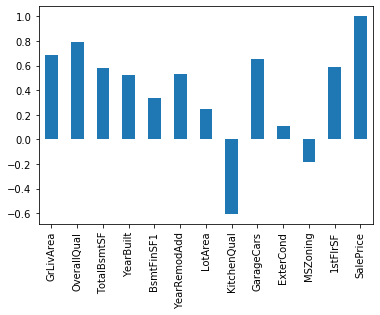

In [83]:
Train1.corr()['SalePrice'].plot(kind="bar")

In [28]:
## Since we only what features that are highly correlated we will drop the 
#OverallCond and MSSUblass from the train dataset.

In [29]:
Train.iloc[1:5,41].head()

Id
2    1262
3     920
4     961
5    1145
Name: 1stFlrSF, dtype: int64

### Selecting the features basing on Permutation Importance

In [84]:
# Potential columns for data analysis
#Train["YearBuilt"] = pd.to_datetime(Train["YearBuilt"],format="%y")
#Train["YearRemodAdd"] = pd.to_datetime(Train["YearRemodAdd"],format="%y")
#Train.dtypes[:30]

#Train =Train[["GrLivArea","OverallQual","TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea","KitchenQual",
 #     "OverallCond","GarageCars","ExterCond","MSSubClass","MSZoning","FireplaceQu","SalePrice"]]
#Train =Train.SalePrice

#Train =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea",
#"KitchenQual","GarageCars","ExterCond","MSZoning","1stFlrSF","SalePrice"]]

#Train.drop(Train[["ExterCond","KitchenQual","MSZoning","LotArea","BsmtFinSF1"]],axis=0)
#,"KitchenQual"
#,"KitchenQual"
#,"YearBuilt"
#,"YearBuilt"
#,"YearRemodAdd"
#,"YearBuilt"
#,"YearBuilt"
Train =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","YearRemodAdd","GarageCars","1stFlrSF","SalePrice"]]

Test = Test[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","YearRemodAdd","GarageCars","1stFlrSF"]]
Test = Test.fillna(Test.mean())

In [31]:
Test

,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageCars,1stFlrSF
Id,,,,,,,
1461,896,5,882.0,1961,1961,1.0,896
1462,1329,6,1329.0,1958,1958,1.0,1329
1463,1629,5,928.0,1997,1998,2.0,928
1464,1604,6,926.0,1998,1998,2.0,926
1465,1280,8,1280.0,1992,1992,2.0,1280
...,...,...,...,...,...,...,...
2915,1092,4,546.0,1970,1970,0.0,546
2916,1092,4,546.0,1970,1970,1.0,546
2917,1224,5,1224.0,1960,1996,2.0,1224


In [32]:
Train.shape

(1330, 8)

# Data Rescaling

In [85]:
# Data splitting and Reshaping
array = Train.values
# separate array into input and output components
#X = array[:,0:8]
#Y = array[:,8]
X = array[:,0:7]
Y = array[:,7]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# Recaling the My Test data
scalert = MinMaxScaler(feature_range=(0,1))
rescaledTest =scalert.fit_transform(Test)
seed =42
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.20,shuffle=True,random_state=seed)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)
#X_train.head()

# Principle Component Analysis

In [34]:
# This segment of code is where the principle component analysis is done.

n_comp = 4

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_train = tsvd.fit_transform(X_train)
tsvd_test = tsvd.transform(X_test)

# PCA Train
pca = PCA(n_components=n_comp, random_state=420)
pca2_train = pca.fit_transform(X_train)
pca2_test = pca.transform(X_test)

#PCA Test
pca = PCA(n_components = n_comp, random_state=420)
#pca2_test = pca.fit_transform(Test)
# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_train = ica.fit_transform(X_train)
ica2_test = ica.transform(X_test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(X_train)
grp_results_test = grp.transform(X_test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(X_train)
srp_results_test = srp.transform(X_test)

# NMF
nmf = NMF(n_components=n_comp, init='nndsvdar', random_state=420)
nmf_results_train = nmf.fit_transform(X_train)
nmf_results_test = nmf.transform(X_test)

## FAG
fag = cluster.FeatureAgglomeration(n_clusters=n_comp, linkage='ward')
fag_results_train = fag.fit_transform(X_train)
fag_results_test = fag.transform(X_test)

## Scoring Metrics
#### Mean Absolute Error
- The mean absolute Error is the average of the absolute differences between predictions and actual values.
- It gives an idea of how wrong the predictions are. 
- A value of 0 indicates no error or perfect predications
- Like logloass the metric is inverted by cross_val_score() function
- #neg_mean_absolute_error


#### Mean Squared Error
- This is simillar to the Mean absolute error in that it provides a gross idea of the magnitude of error.
- Taking thesquare root of the mean squared error converts the units back into the original units of the output variable and can be meaningful for description and presentation.
- #neg_mean_squred_error


#### R2 metric
- The R2 metric provides an indication of the goodness of fit of a set of predications to teh actual values.
- In statistical it is called the coefficient of determination. 
- The value is between 0 and 1
- #r2

# SPOT CHECKING THE ALGORITHMS

LR: -0.383575 (0.095683)
KNN: 0.715824 (0.082891)
CART: 0.577308 (0.156909)
SVM: -0.202919 (0.167673)
SG: 0.401256 (0.063537)
REG: 0.466736 (0.058472)
BRR: 0.466347 (0.060731)
XGBOOST: 0.696497 (0.081890)


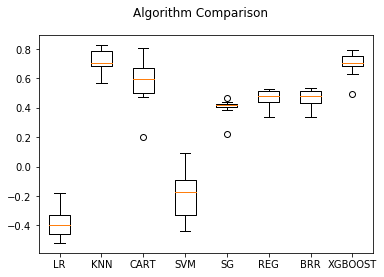

In [86]:
#SPOT CHECKING THE ALGORITHMS
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVC()))
#models.append(('NN',MLPRegressor()))#//Poor performance
models.append(('SG',SGDRegressor()))
models.append(('REG',RidgeCV()))
models.append(('BRR',BayesianRidge()))
models.append(('XGBOOST',XGBRegressor()))

## Root Mean Squared Log Error
#rmsle = math.sqrt(mean_squared_log_error())
#rmsle = make_scorer(math.sqrt(mean_squared_log_error()))
# evaluate each model in turn

def rmsle(y,ypred):
    y =np.array(y)
    ypred=np.array(ypred)
    assert len(y) == len(ypred)
    # X_used: numpy.ndarray  {n_samples, n_features_used}
    terms_to_sum= [(math.log(ypred[i]+1) - math.log(y[i]+1)) **2.0 for i,pred in enumerate(ypred)]
    return (sum(terms_to_sum)* (1.0/len(y))) ** 0.5

#scorer = {'main': 'r2',
 #         'custom_rmsle': make_scorer(rmsle,needs_xvals = True)}


results = []
names = []
seed =25
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
    scoring='r2')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
#print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

```
sorted(sklearn.metrics.SCORERS.keys())
help(type(LogisticRegression))
```

#### Gaussian Process Regressor

In [52]:
#Gaussian Process Regressor
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
#Running requires Kernels
#model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)#kagle
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_train, y_train)
params = model.kernel_.get_params()
y_pred, std = model.predict(X_test, return_std=True)
MSE = ((y_pred-y_test)**2).mean()
MSE1 = mean_squared_error(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
r2 = r2_score(y_pred,y_test)
print(MSE1)
print(r2)

NameError: name 'GaussianProcessRegressor' is not defined

#### Voting Classifier

In [87]:
#Voting Classifier
REG = RidgeCV()
REG.fit(X_train,y_train)

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

XGB = XGBRegressor()
XGB.fit(X_train,y_train)

ensemble=VotingRegressor(estimators=[('REG', REG),('knn',KNN),("XGBOOST",XGB)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
knn_pred =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_classier.csv", header =["Id","SalePrice"], index =False,sep="," )

0.20575683358923816
0.7544974342279271
0.5935720550085966


# Hyperparameter tunning

#### Grid Searsch Ridge Regressor

In [88]:
# Grid Searsch Ridge Regressor

parameters = [{'alpha':[0.001,0.1,1,100,1000,10000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR,parameters,cv=4)
Grid1.fit(X_train,y_train)
print(Grid1.best_estimator_)
scores = Grid1.cv_results_
print(scores['mean_test_score'])
Grid_pred = Grid1.predict(X_test)
MSE = mean_squared_error(Grid_pred,y_test)
r2 = r2_score(Grid_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(Grid_pred, y_test))
rmsle1 =rmsle(Grid_pred, y_test)
print(MSE)
print(r2)
print(RMSLE)
print(rmsle1)

alpha_vals =  [0.001, 0.1, 1, 100, 1000, 10000]

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
[ 4.72017762e-01  4.73600832e-01  4.51030152e-01  9.39015816e-02
  1.18971421e-02 -1.30915369e-04]
2359367454.4487314
-0.0971325567141561
0.27390594405183816
0.2739059440518382


#### K Nearest Neighbours Regressor

In [89]:
# KNN
# Number of neighbors to use by default for kneighbors queries.
k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range,p=[1,2])
#param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'p':[1,2]}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2')
grid.fit(X_train,y_train)
print(grid.best_estimator_)
scores = grid.cv_results_

print(scores['mean_test_score'])


knn=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                    weights='uniform')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
MSE = mean_squared_error(knn_pred,y_test)
r2 = r2_score(knn_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(knn_pred,y_test))

print(MSE)
print(r2)
print(RMSLE)
#Test =Test.fillna(Test.mean(),inplace=True)
#Test.reshape(-1, 1)
Test = normalize(rescaledTest)
knn_pred =knn.predict(Test)

fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
fypred.to_csv("Knn_rescaled2.csv", header =["Id","SalePrice"], index = False,sep="," )
#Test

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                    weights='uniform')
[0.6146828  0.58138833 0.69255375 0.68224854 0.72563554 0.70857378
 0.74252458 0.71262558 0.73524581 0.71817573 0.74217733 0.71689003
 0.73800202 0.7267581  0.73644241 0.72834451 0.74082844 0.72821825
 0.74334286 0.73212429 0.7465525  0.7320034  0.74111396 0.72928656
 0.73831694 0.7280379  0.73630063 0.727232   0.73336861 0.72368663]
1201850965.3455863
0.666085383716458
0.20955865862735365


#### GridSearch XGBOOST

In [90]:
#GridSearch XGBOOST
#"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
X_test = normalize(X_test)
parameters ={
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "eta"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
 }
model = XGBRegressor()
Grid2 = GridSearchCV(model,parameters,cv=10)
Grid2.fit(X_train,y_train)
y_pred = Grid2.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)



1100512152.1113024
0.7104928157749444
0.20055515632429505


In [91]:
Grid2.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [92]:
# XGBoost
params={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps = 40
#{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 #"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 #"min_child_weight" : [ 1, 3, 5, 7 ],
 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
#eta=0.3,max_depth=4
model = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
                     gpu_id=-1, importance_type='gain', interaction_constraints=None,
                     learning_rate=0.100000001, max_delta_step=0, max_depth=4,
                     min_child_weight=7,  monotone_constraints=None,
                     n_estimators=100, n_jobs=0, num_parallel_tree=1,
                     objective='reg:squarederror', random_state=0, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                     validate_parameters=False, verbosity=None)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)

Test = normalize(rescaledTest)
grid_preds =model.predict(rescaledTest)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(grid_preds)
#frpred["Id"] = Test["Id"]
fypred.to_csv("XGBOOST_rescaled.csv", header =["Id","SalePrice"], index = False,sep="," )

1100512152.1113024
0.7104928157749444
0.20055515632429505


#### Voting Regressor with hyperparameters

In [93]:
#Voting Classifier
CART = DecisionTreeRegressor()
CART.fit(X_train,y_train)

KNN = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                    weights='uniform')
KNN.fit(X_train,y_train)

XGB = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
                     gpu_id=-1, importance_type='gain', interaction_constraints=None,
                     learning_rate=0.100000001, max_delta_step=0, max_depth=4,
                     min_child_weight=7,  monotone_constraints=None,
                     n_estimators=100, n_jobs=0, num_parallel_tree=1,
                     objective='reg:squarederror', random_state=0, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                     validate_parameters=False, verbosity=None)
XGB.fit(X_train,y_train)

ensemble=VotingRegressor(estimators=[('CART', CART),('knn',KNN),("XGBOOST",XGB)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
VC_test =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(VC_test)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_classier_HP.csv", header =["Id","SalePrice"], index =False,sep="," )

0.20159865216573222
0.765766107475644
0.6883837335363114
